In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn.metrics as metrics
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
FIGURE_SIZE = (20, 10)
plt.rcParams['axes.grid'] = True

%matplotlib inline

In [ ]:
import tensorflow as tf

In [ ]:
tf.random.set_seed(1234)

In [ ]:
df11 = pd.read_csv("/content/stock.csv")
df11.head()

,Date,Adj Close,differenced_trasnformation_demand,differenced_demand_filled,differenced_inv_transformation_demand,date,year,month,week,day,dayofweek,week_of_month,is_weekend
0,2010-01-04,6.562589,NaN,6.562589,6.562589,2010-01-04,2010,1,1,4,0,1,0
1,2010-01-05,6.573936,0.011347,0.011347,6.573936,2010-01-05,2010,1,1,5,1,1,0
2,2010-01-06,6.469368,-0.104568,-0.104568,6.469368,2010-01-06,2010,1,1,6,2,1,0
3,2010-01-07,6.457407,-0.011961,-0.011961,6.457407,2010-01-07,2010,1,1,7,3,1,0
4,2010-01-08,6.500340,0.042933,0.042933,6.500340,2010-01-08,2010,1,1,8,4,2,0


In [ ]:
df11

,Date,Adj Close,differenced_trasnformation_demand,differenced_demand_filled,differenced_inv_transformation_demand,date,year,month,week,day,dayofweek,week_of_month,is_weekend
0,2010-01-04,6.562589,NaN,6.562589,6.562589,2010-01-04,2010,1,1,4,0,1,0
1,2010-01-05,6.573936,0.011347,0.011347,6.573936,2010-01-05,2010,1,1,5,1,1,0
2,2010-01-06,6.469368,-0.104568,-0.104568,6.469368,2010-01-06,2010,1,1,6,2,1,0
3,2010-01-07,6.457407,-0.011961,-0.011961,6.457407,2010-01-07,2010,1,1,7,3,1,0
4,2010-01-08,6.500340,0.042933,0.042933,6.500340,2010-01-08,2010,1,1,8,4,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2975,2021-10-27,148.850006,-0.470001,-0.470001,148.850006,2021-10-27,2021,10,43,27,2,4,0
2976,2021-10-28,152.570007,3.720001,3.720001,152.570007,2021-10-28,2021,10,43,28,3,4,0
2977,2021-10-29,149.800003,-2.770004,-2.770004,149.800003,2021-10-29,2021,10,43,29,4,5,0
2978,2021-11-01,148.960007,-0.839996,-0.839996,148.960007,2021-11-01,2021,11,44,1,0,1,0


<Axes: xlabel='Date'>

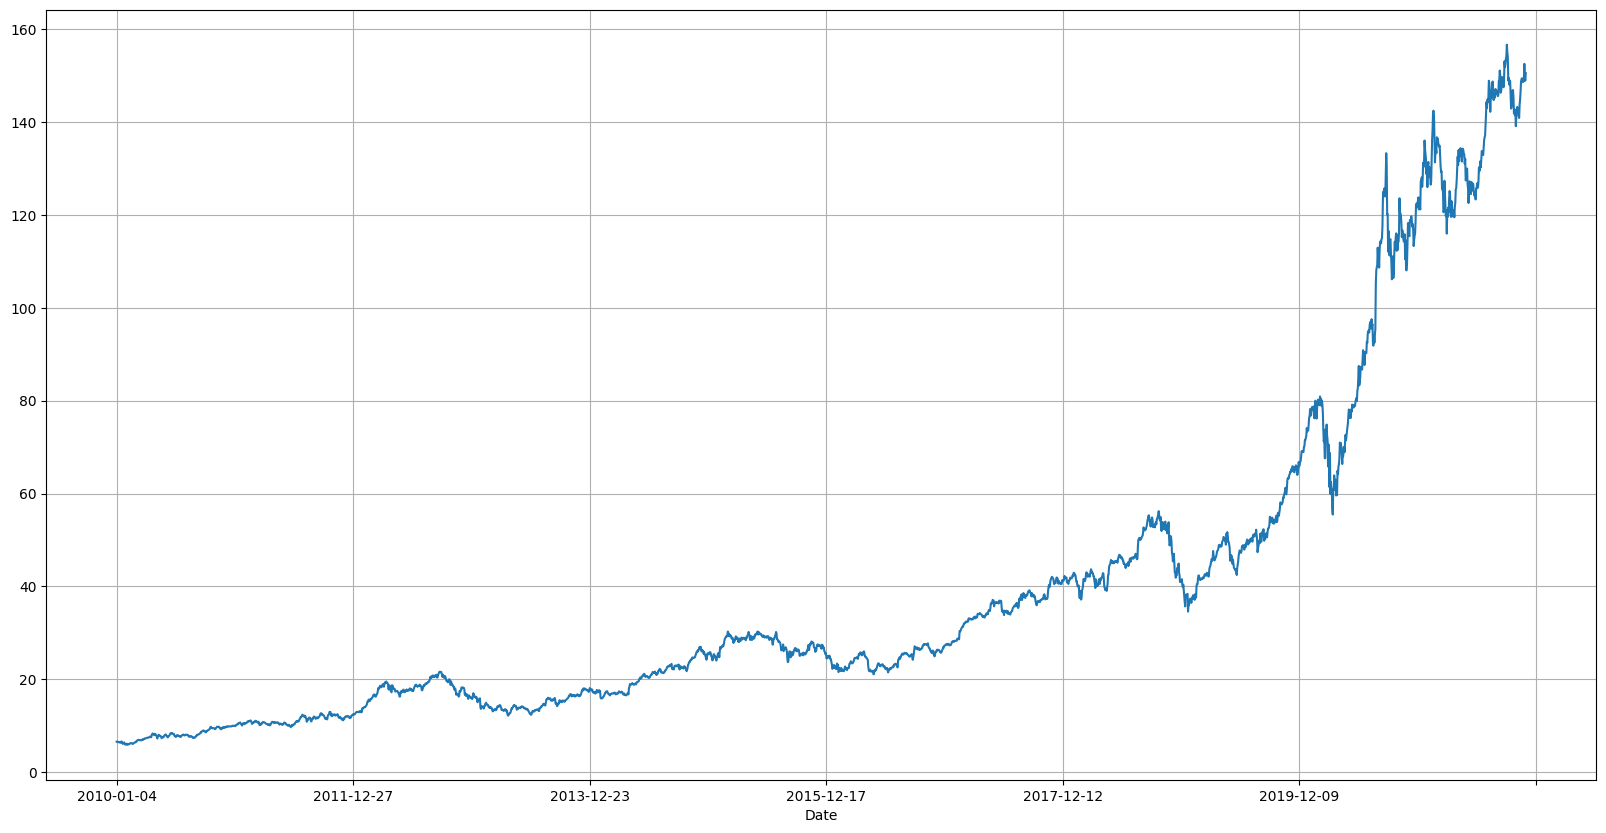

In [ ]:
df11.set_index('Date')['Adj Close'].plot(figsize=FIGURE_SIZE)

In [ ]:
mask = (df11['date'] > '2010-01-01') & (df11['date'] <= '2019-12-31')
print(df11.loc[mask])

            Date  Adj Close  differenced_trasnformation_demand  \
0     2010-01-04   6.562589                                NaN   
1     2010-01-05   6.573936                           0.011347   
2     2010-01-06   6.469368                          -0.104568   
3     2010-01-07   6.457407                          -0.011961   
4     2010-01-08   6.500340                           0.042933   
...          ...        ...                                ...   
2511  2019-12-24  70.129509                           0.066605   
2512  2019-12-26  71.520905                           1.391396   
2513  2019-12-27  71.493767                          -0.027138   
2514  2019-12-30  71.918076                           0.424309   
2515  2019-12-31  72.443565                           0.525489   

      differenced_demand_filled  differenced_inv_transformation_demand  \
0                      6.562589                               6.562589   
1                      0.011347                            

In [ ]:
df12=df11.loc[mask]

In [ ]:
#X=  df11[['Date']]
y= df11['Adj Close']

In [ ]:

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
y=scaler.fit_transform(np.array(y).reshape(-1,1))

In [ ]:
##splitting dataset into train and test split
##splitting dataset into train and test split
training_size=int(len(y)*0.65)
test_size=len(y)-training_size
train_data,test_data=y[0:training_size],y[training_size:len(y)]

In [ ]:
training_size,test_size

(1937, 1043)

In [ ]:
train_data[2]

array([0.00384731])

In [ ]:
def create_dataset(dataset, time_step=1):
 dataX, dataY = [], []
 for i in range(len(dataset)-time_step-1):
  a = dataset[i:(i+time_step), 0]  #0-100
  dataX.append(a)
  dataY.append(dataset[i + time_step, 0])
 return numpy.array(dataX), numpy.array(dataY)

In [ ]:
import numpy

In [ ]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:

print(X_train.shape), print(y_train.shape)

(1836, 100)
(1836,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(942, 100)
(942,)


(None, None)

In [ ]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout ,BatchNormalization
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.initializers import RandomNormal, Constant

In [ ]:
# model=Sequential()
# model.add(LSTM(150,return_sequences=True,input_shape=(100,1)))
# model.add(Dropout(0.2))
# model.add(LSTM(150,return_sequences=True))
# model.add(LSTM(150, return_sequences=True))
# model.add(Dropout(0.2))
# model.add(LSTM(100))
# model.add(Dropout(0.2))
# model.add(Dense(1))
# model.compile(loss='mean_squared_error',optimizer='adam')


model=Sequential()
# Adding first LSTM layer
model.add(LSTM(units=100, return_sequences=True, input_shape=(100,1)))
model.add(Dropout(0.2))
# second LSTM layer
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))
# Adding third LSTM layer
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))
# Adding fourth LSTM layer
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))
# Adding fifth LSTM layer a
model.add(LSTM(units=100))
model.add(Dropout(0.2))
# Adding the Output Layer
model.add(Dense(units=1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                        │ (None, 100, 100)            │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100, 100)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 100, 100)            │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 100, 100)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 100, 100)            │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 100, 100)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_8 (LSTM)                        │ (None, 100, 100)            │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 100, 100)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 362,501 (1.38 MB)

 Trainable params: 362,501 (1.38 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

history= model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=54,batch_size=84,verbose=1)

Epoch 1/54
22/22 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - loss: 0.0031 - val_loss: 0.0129
Epoch 2/54
22/22 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - loss: 2.6321e-04 - val_loss: 0.0072
Epoch 3/54
22/22 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - loss: 1.4188e-04 - val_loss: 0.0071
Epoch 4/54
22/22 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - loss: 1.1015e-04 - val_loss: 0.0049
Epoch 5/54
22/22 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - loss: 1.1249e-04 - val_loss: 0.0021
Epoch 6/54
22/22 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - loss: 1.0997e-04 - val_loss: 0.0029
Epoch 7/54
22/22 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - loss: 1.0238e-04 - val_loss: 0.0035
Epoch 8/54
22/22 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - loss: 1.0415e-04 - val_loss: 0.0035
Epoch 9/54
22/22 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - loss: 8.4367e-05 - val_loss: 0.0024
Epoch 10/54
22/22 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - loss: 9.6758e-05 - val_loss: 0.0019
Epoch 11/54
22/22 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - loss: 8.1482e-05 - val_loss: 0.0024
Epoch 12/54
22/22 ━━━━━━━━━━━━━━━━

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10,
        verbose=1, mode='auto', restore_best_weights=True)

history=model.fit(X_train,y_train,validation_data=(X_test,ytest),
        callbacks=[monitor],verbose=1,epochs=1000)

Epoch 1/1000
58/58 ━━━━━━━━━━━━━━━━━━━━ 30s 515ms/step - loss: 4.5824e-05 - val_loss: 0.0011
Epoch 2/1000
58/58 ━━━━━━━━━━━━━━━━━━━━ 30s 512ms/step - loss: 5.8404e-05 - val_loss: 6.4865e-04
Epoch 3/1000
58/58 ━━━━━━━━━━━━━━━━━━━━ 41s 510ms/step - loss: 4.6847e-05 - val_loss: 0.0036
Epoch 4/1000
58/58 ━━━━━━━━━━━━━━━━━━━━ 30s 510ms/step - loss: 4.2078e-05 - val_loss: 4.5071e-04
Epoch 5/1000
58/58 ━━━━━━━━━━━━━━━━━━━━ 30s 517ms/step - loss: 5.1238e-05 - val_loss: 0.0012
Epoch 6/1000
58/58 ━━━━━━━━━━━━━━━━━━━━ 41s 521ms/step - loss: 4.4823e-05 - val_loss: 0.0013
Epoch 7/1000
58/58 ━━━━━━━━━━━━━━━━━━━━ 41s 520ms/step - loss: 3.7618e-05 - val_loss: 0.0014
Epoch 8/1000
58/58 ━━━━━━━━━━━━━━━━━━━━ 41s 523ms/step - loss: 4.7397e-05 - val_loss: 0.0015
Epoch 9/1000
58/58 ━━━━━━━━━━━━━━━━━━━━ 41s 525ms/step - loss: 3.7037e-05 - val_loss: 3.0727e-04
Epoch 10/1000
58/58 ━━━━━━━━━━━━━━━━━━━━ 30s 520ms/step - loss: 3.8037e-05 - val_loss: 0.0017
Epoch 11/1000
58/58 ━━━━━━━━━━━━━━━━━━━━ 41s 518ms/step -

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.17.0'

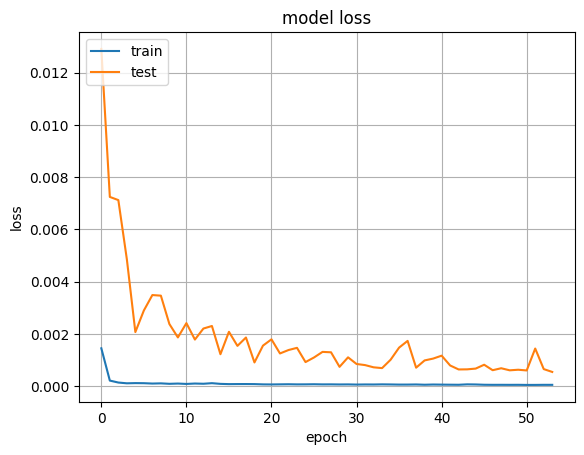

In [ ]:
plt.plot(history.history['loss']) #r
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

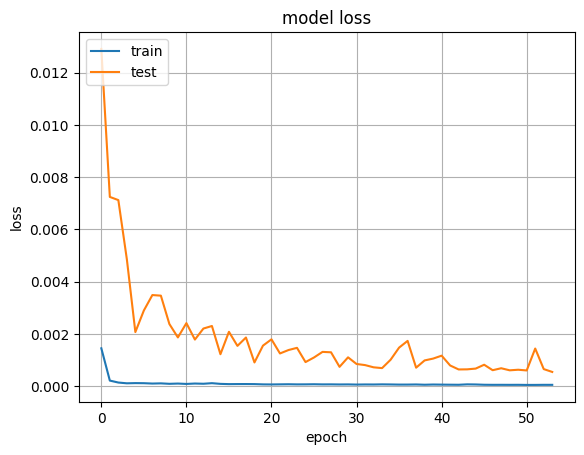

In [ ]:
plt.plot(history.history['loss']) # vn
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

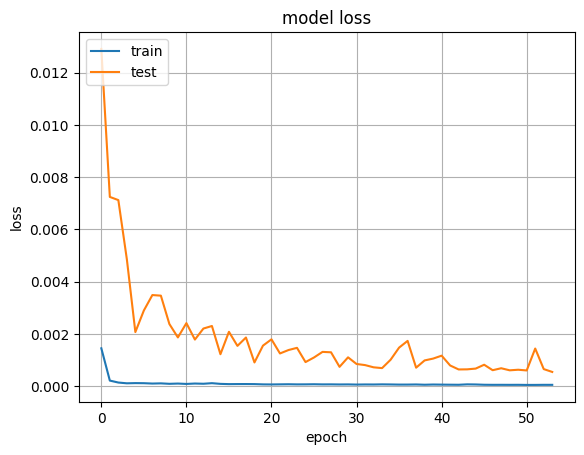

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

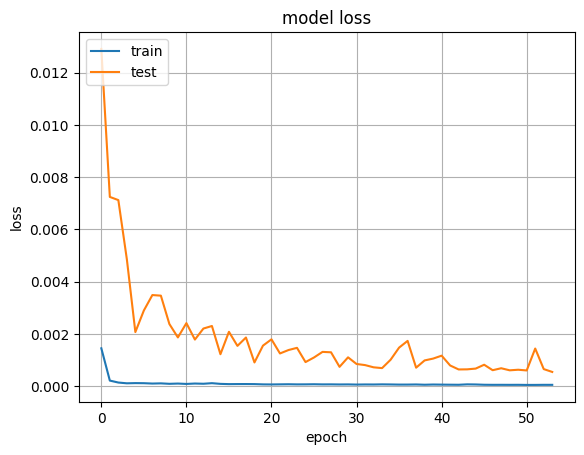

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

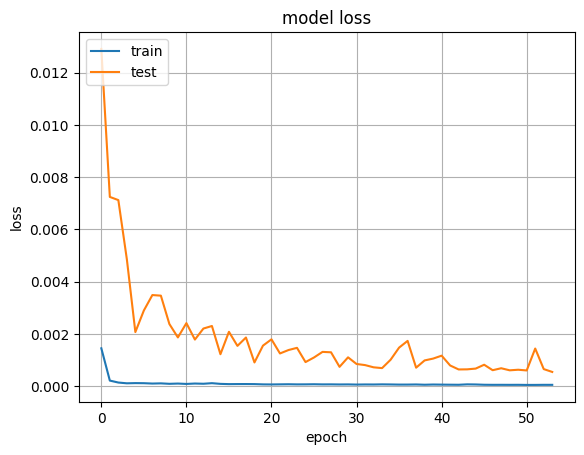

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

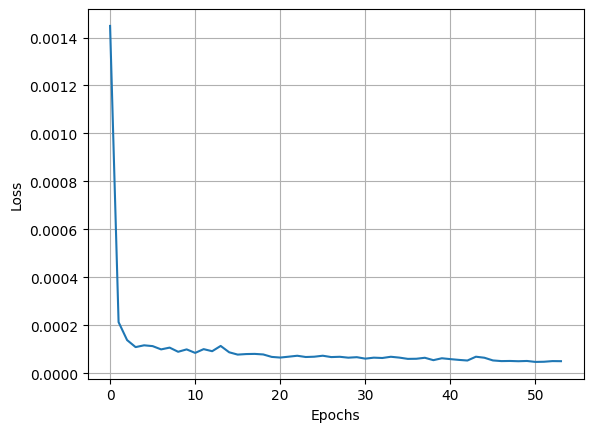

In [ ]:
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

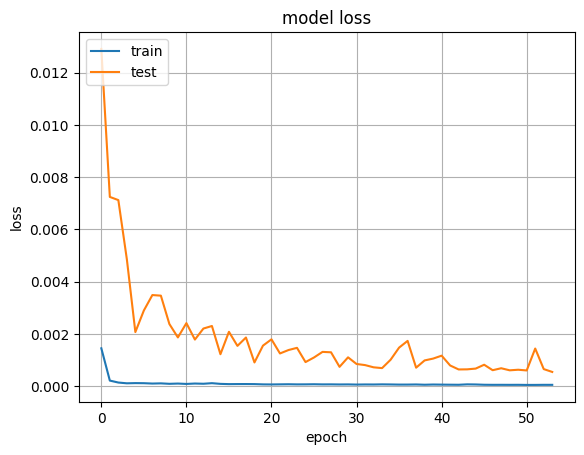

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

58/58 ━━━━━━━━━━━━━━━━━━━━ 10s 153ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/step


In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

21.398138293579052

In [ ]:
math.sqrt(mean_squared_error(ytest,test_predict))

88.26001396112548

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

21.398138293579052

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

88.26001396112548

In [ ]:

### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

21.398138293579052

In [ ]:
math.sqrt(mean_squared_error(ytest,test_predict))

88.26001396112548

In [ ]:
## Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

21.398138293579052

In [ ]:
#Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

88.26001396112548

In [ ]:
## Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

21.398138293579052

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

88.26001396112548

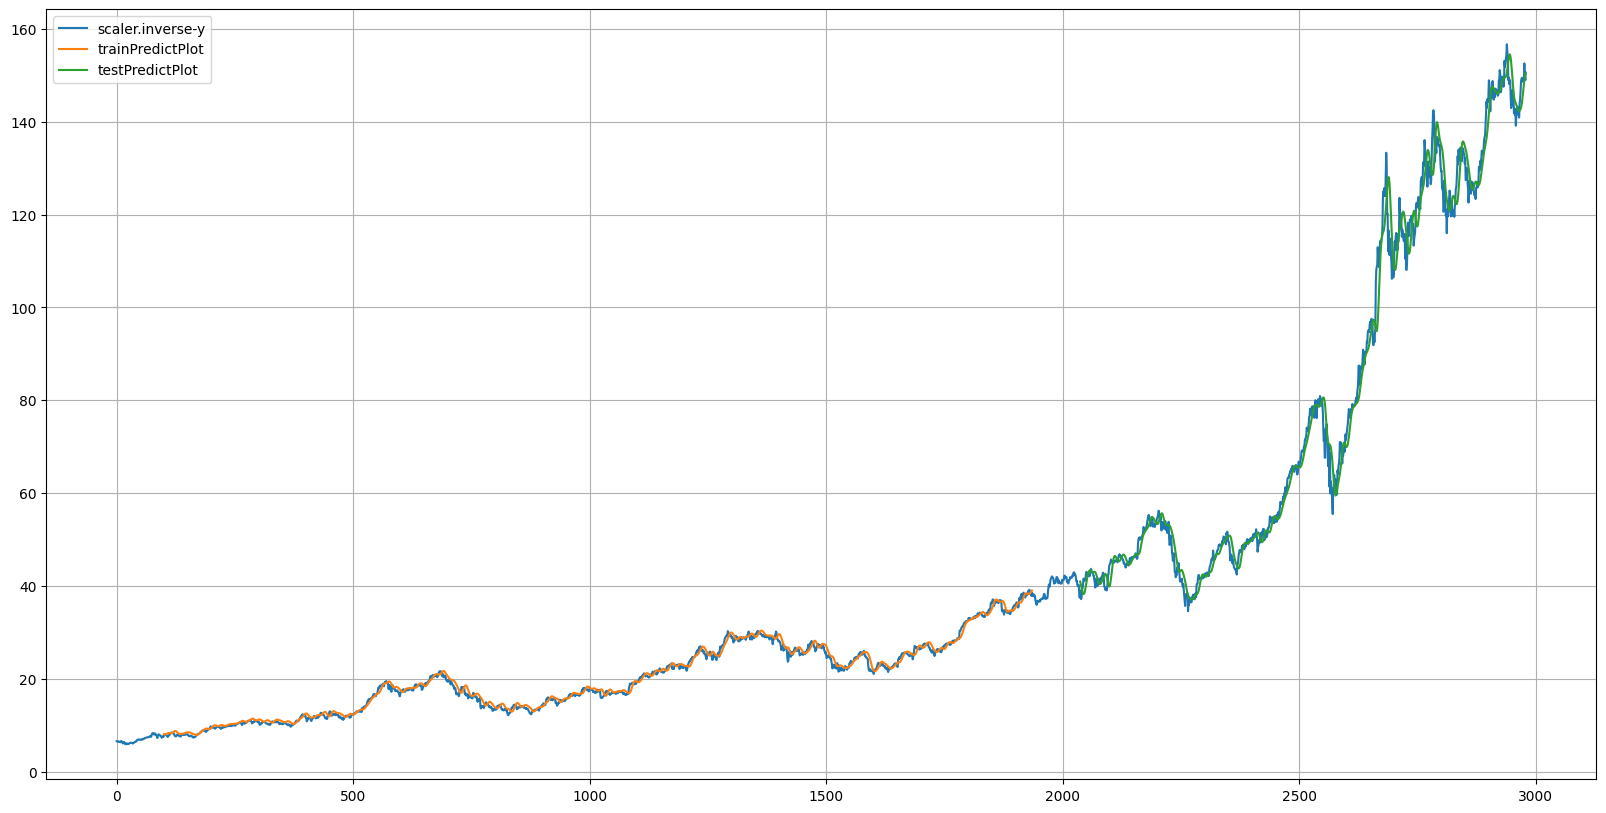

In [ ]:
### Plotting
# shift train predictions for plotting
look_back=100
fig, ax = plt.subplots(figsize=(20,10))
trainPredictPlot = numpy.empty_like(y)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(y)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(y)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(y))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['scaler.inverse-y','trainPredictPlot','testPredictPlot'])
plt.show()

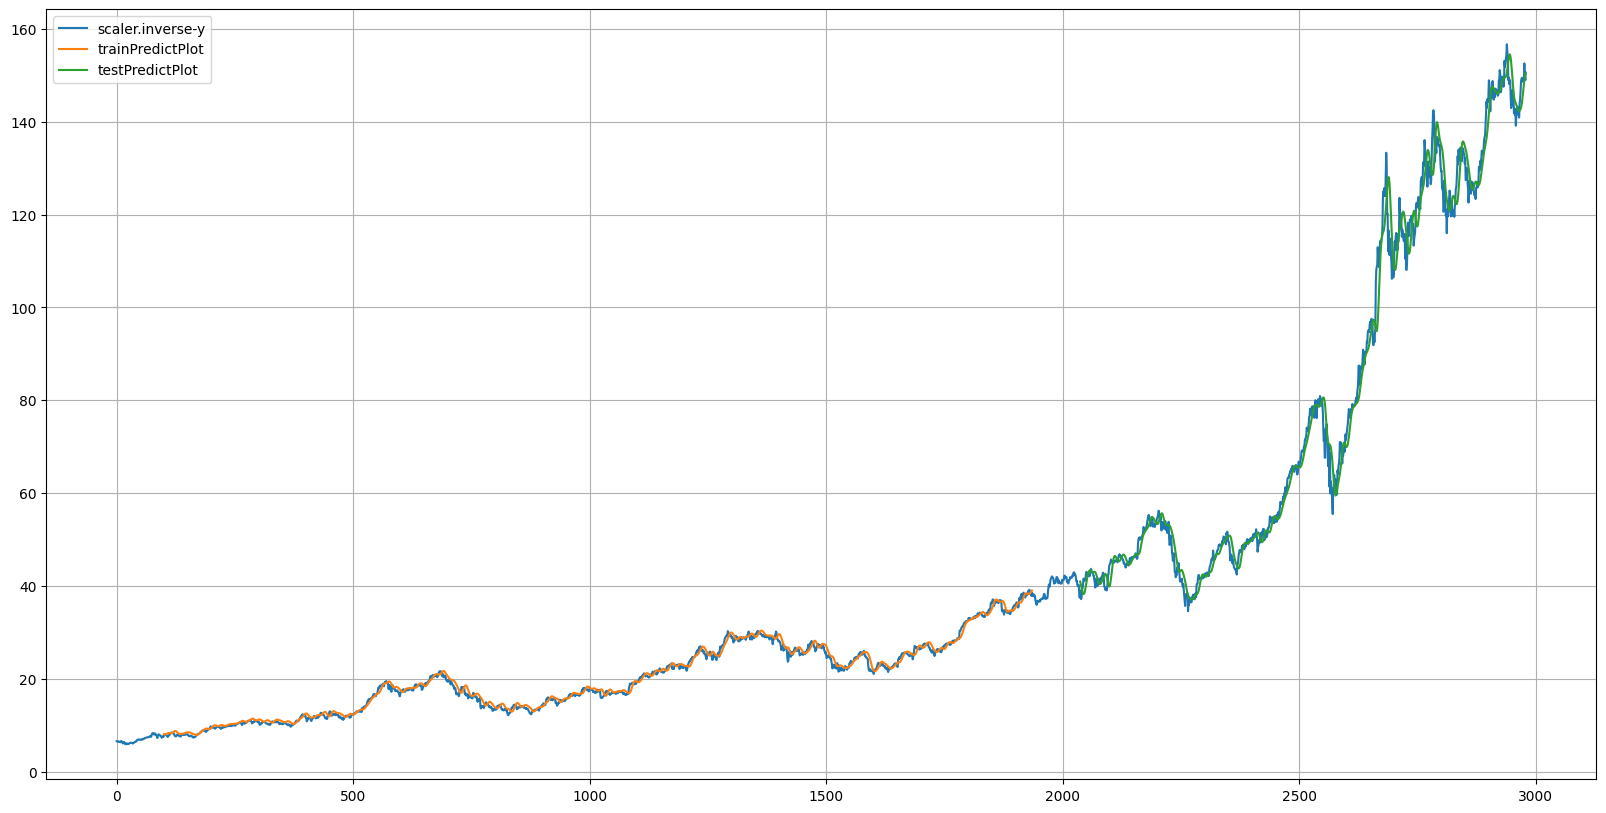

In [ ]:
# shift train predictions for plotting
look_back=100
fig, ax = plt.subplots(figsize=(20,10))
trainPredictPlot = numpy.empty_like(y)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(y)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(y)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(y))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['scaler.inverse-y','trainPredictPlot','testPredictPlot'])
plt.show()

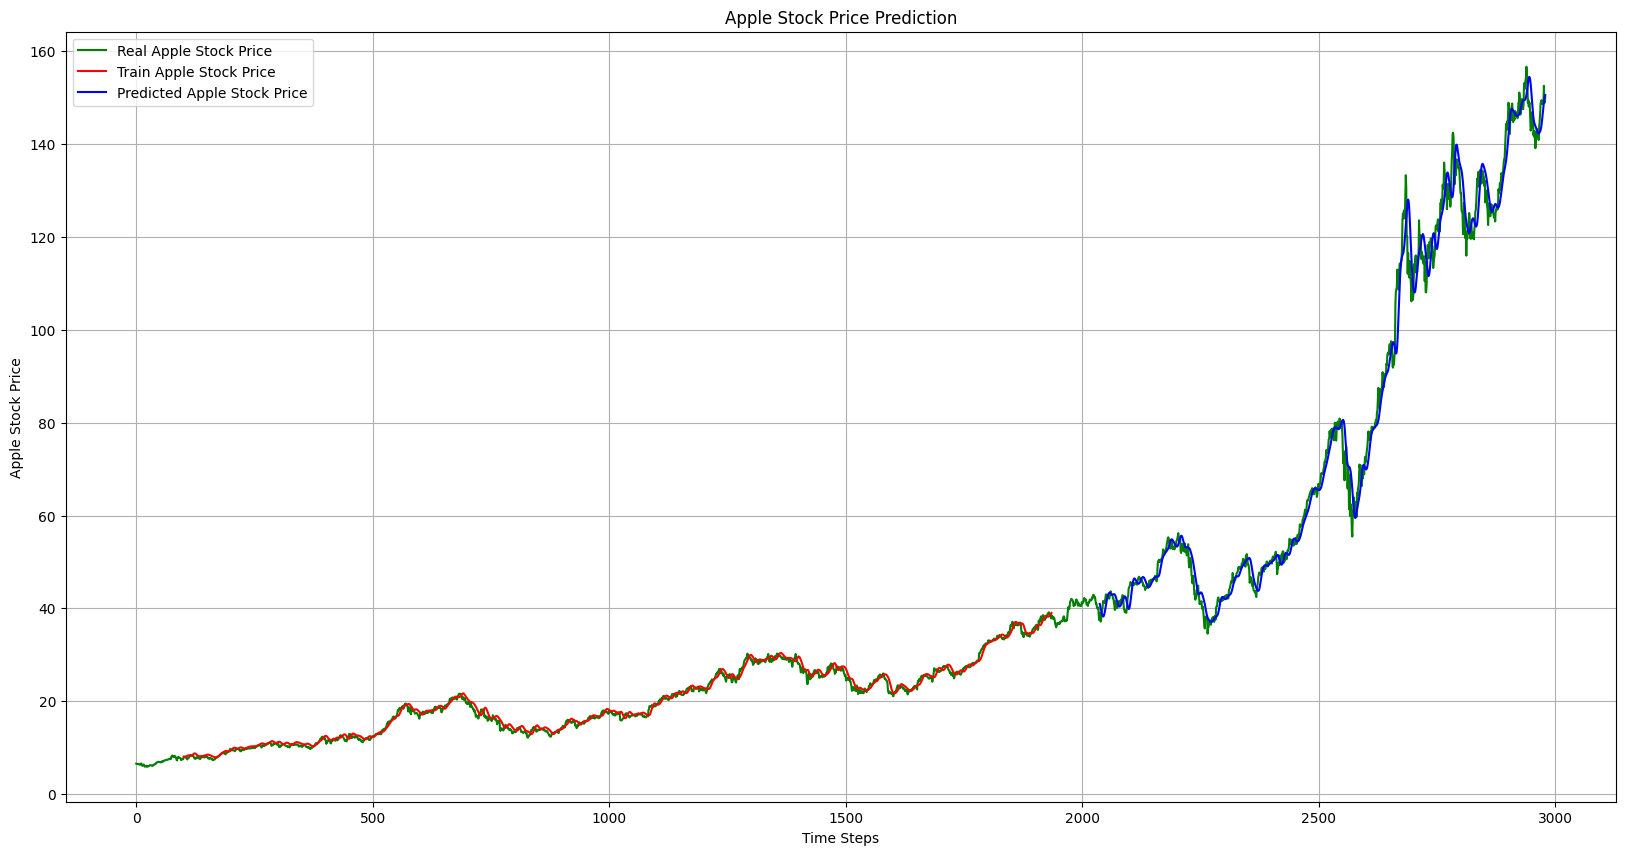

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(scaler.inverse_transform(y), color='Green', label='Real Apple Stock Price')
plt.plot(trainPredictPlot, color='Red', label='Train Apple Stock Price')
plt.plot(testPredictPlot, color='Blue', label='Predicted Apple Stock Price')

plt.title('Apple Stock Price Prediction')
plt.xlabel('Time Steps')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

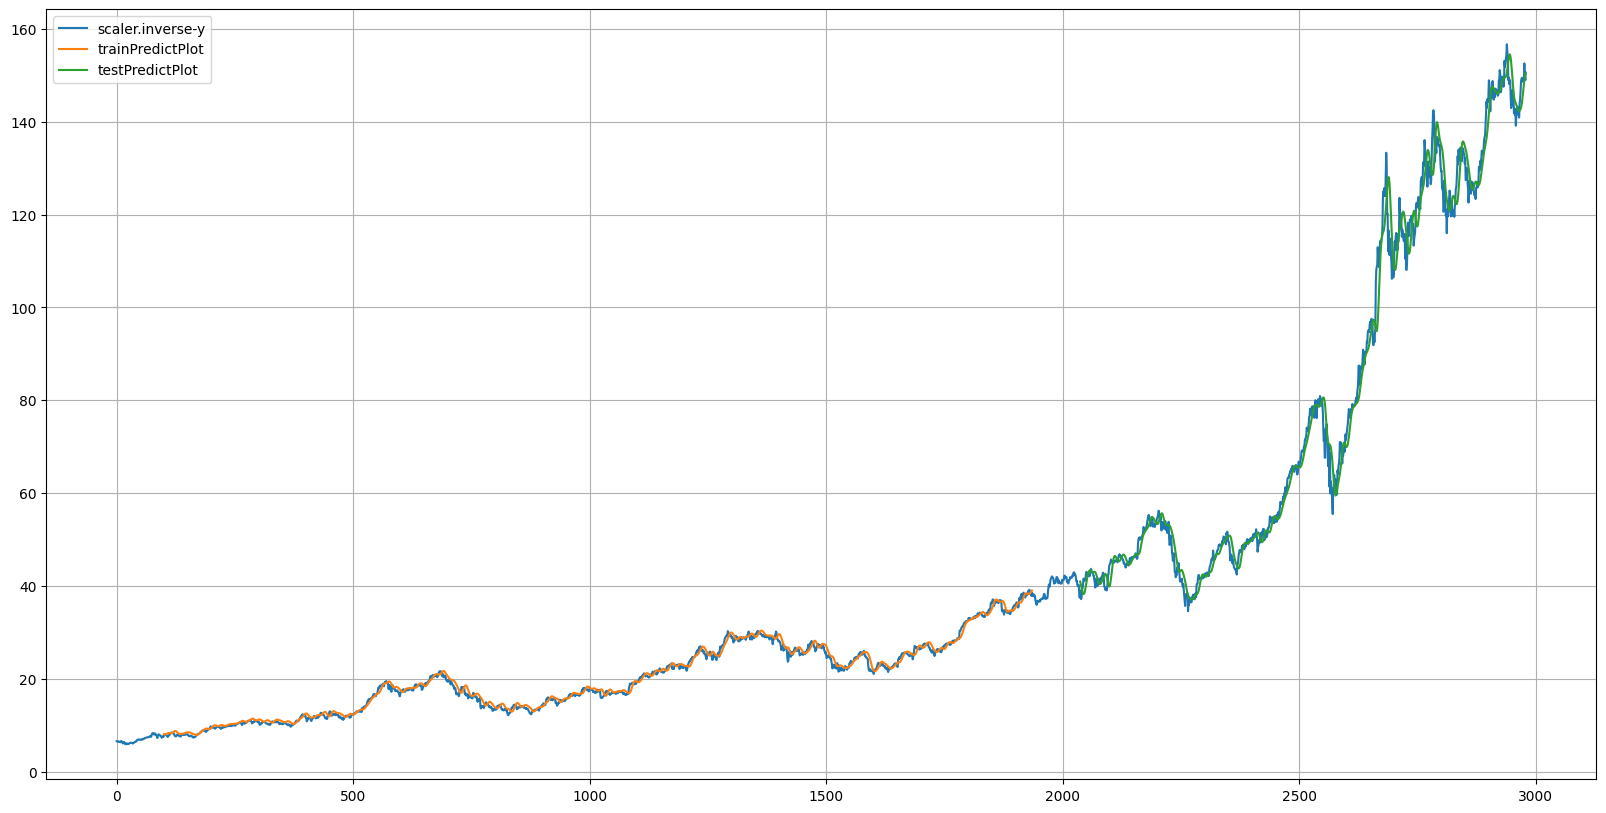

In [ ]:
## Plotting
# shift train predictions for plotting
look_back=100
fig, ax = plt.subplots(figsize=(20,10))
trainPredictPlot = numpy.empty_like(y)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(y)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(y)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(y))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['scaler.inverse-y','trainPredictPlot','testPredictPlot'])
plt.show()

In [ ]:
# evaluate the model
train_mse = model.evaluate(X_train, y_train, verbose=1)
test_mse = model.evaluate(X_test, ytest, verbose=1)

58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 132ms/step - loss: 1.7484e-05
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 137ms/step - loss: 2.9463e-04


In [ ]:
train_mse > test_mse

False

In [ ]:
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

Train: 0.000, Test: 0.001


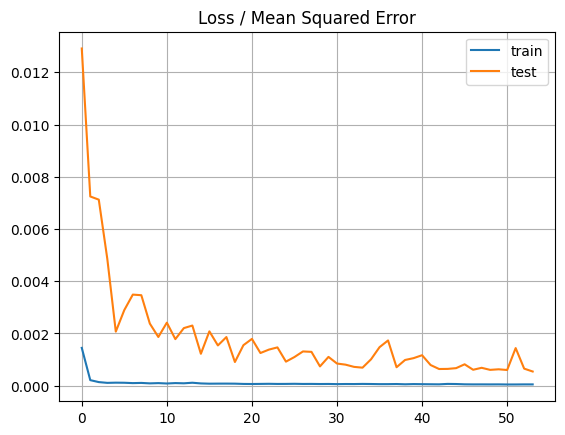

In [ ]:
# plot loss during training
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")

import yfinance as yf
# The pdr_override function is no longer necessary in recent versions of yfinance.
# yf.pdr_override() # Remove or comment out this line

# You can directly use yfinance to download data.
# For example, to download data for Apple (AAPL) for the past year:
# data = yf.download("AAPL", period="1y")

In [ ]:
symbol = 'AAPL'
start = '2020-01-01'
end = '2021-01-01'
df = yf.download(symbol, start, end)
df = df.reset_index()

[*********************100%***********************]  1 of 1 completed


In [ ]:
df.head()

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
0,2020-01-02 00:00:00+00:00,72.876122,75.087502,75.150002,73.797501,74.059998,135480400
1,2020-01-03 00:00:00+00:00,72.167603,74.357498,75.144997,74.125000,74.287498,146322800
2,2020-01-06 00:00:00+00:00,72.742653,74.949997,74.989998,73.187500,73.447502,118387200
3,2020-01-07 00:00:00+00:00,72.400528,74.597504,75.224998,74.370003,74.959999,108872000
4,2020-01-08 00:00:00+00:00,73.565193,75.797501,76.110001,74.290001,74.290001,132079200


In [ ]:
df.tail()

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
248,2020-12-24 00:00:00+00:00,129.189514,131.970001,133.460007,131.100006,131.320007,54930100
249,2020-12-28 00:00:00+00:00,133.810059,136.690002,137.339996,133.509995,133.990005,124486200
250,2020-12-29 00:00:00+00:00,132.028427,134.869995,138.789993,134.339996,138.050003,121047300
251,2020-12-30 00:00:00+00:00,130.902618,133.720001,135.990005,133.399994,135.580002,96452100
252,2020-12-31 00:00:00+00:00,129.894348,132.690002,134.740005,131.720001,134.080002,99116600


In [ ]:
X_train = df[df.columns[1:5]] # data_aal[['open', 'high', 'low', 'close']]
Y_train = df['Adj Close']

In [ ]:
X_train = X_train.values[:-1]
Y_train = Y_train.values[1:]

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train, Y_train)

LinearRegression()

In [ ]:
X_test = df[df.columns[1:5]].values[:-1]
Y_test = df['Adj Close'].values[1:]

In [ ]:
lr.score(X_test, Y_test)

0.986882023892524

In [ ]:
opening_price = float(input('Open: '))
high = float(input('High: '))
low = float(input('Low: '))
close = float(input('Close: '))
print('My Prediction the opening price will be:', lr.predict([[opening_price, high, low, close]])[0])

Open: 131.320007
High: 133.460007
Low: 131.100006	
Close: 131.970001
My Prediction the opening price will be: [133.41927907]
